# 충남과학고등학교 데이터분석 특강 (3H / 6H)
## 예제로 배우는 데이터 분석
### 초급: 3H, 중급: 6H (초중급 3H 동일)

## Case 6: 대전광역시 공공자전거 타슈 데이터 분석 - 공개 데이터 분석
### Question: 타슈 이용 경로 및 정류장 분석
##### 데이터출처1: [공공데이터포털](https://www.data.go.kr/data/15062798/fileData.do)
##### 데이터출처2: [대전광역시시설관리공단](https://www.djsiseol.or.kr/portal/sub050201.asp)
##### 원시 데이터 전처리 완료 후 진행: pickle (.pkl)

### Step 1. Question - 전처리 데이터 불러오기 및 datetime 데이터 다루기

#### 도구 불러오기

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 타슈 대여 이력 데이터 불러오기 및 datetime 자료형 처리

In [2]:
df_rent = pd.read_pickle('datasets/tashu/tashu_dataset-rental_history.pkl')
df_rent['대여일시'] = pd.to_datetime(df_rent['대여일시'], format='%Y%m%d%H%M%S')
df_rent['반납일시'] = pd.to_datetime(df_rent['반납일시'], format='%Y%m%d%H%M%S')
df_rent

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,46,2016-01-01 05:00:15,17,2016-01-01 05:04:51,380.0,0
1,152,2016-01-01 05:06:29,82,2016-01-01 05:37:53,3190.0,2
2,133,2016-01-01 05:24:16,172,2016-01-01 05:56:47,2070.0,2
3,133,2016-01-01 05:29:19,172,2016-01-01 05:57:34,2080.0,2
4,39,2016-01-01 05:32:44,57,2016-01-01 05:40:33,860.0,0
...,...,...,...,...,...,...
2791301,87,2020-12-31 23:38:50,118,2021-01-01 00:21:39,0.0,2
2791302,182,2020-12-31 23:38:56,182,2020-12-31 23:39:37,0.0,2
2791303,42,2020-12-31 23:45:59,83,2021-01-01 00:12:15,2470.0,0
2791304,115,2020-12-31 23:51:32,196,2021-01-01 00:15:02,1730.0,0


#### 자료형 확인

In [3]:
df_rent.dtypes

대여스테이션             int16
대여일시      datetime64[ns]
반납스테이션             int16
반납일시      datetime64[ns]
이동거리             float32
회원구분                int8
dtype: object

#### 타슈 정류장 데이터 불러오기

In [4]:
df_station = pd.read_pickle('datasets/tashu/tashu_dataset-station_information.pkl')
df_station

,Station 스테이션/성명,위치,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명
연번,,,,,,,,,,
1,무역전시관입구(택시승강장),대전광역시 유성구 도룡동 3-8,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동
2,대전컨벤션센터,대전광역시 유성구 도룡동 4-19,30,대전광역시,30200,유성구,3020012700,도룡동,3020055000,신성동
3,한밭수목원1,대전광역시 서구 만년동 396,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동
4,초원아파트(104동 버스정류장),대전광역시 서구 만년동 401,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동
5,둔산대공원 입구(버스정류장),대전광역시 서구 둔산2동 1521-10,30,대전광역시,30170,서구,3017011200,둔산동,3017064000,둔산2동
...,...,...,...,...,...,...,...,...,...,...
258,천문대입구,대전광역시 유성구 신성동 458,30,대전광역시,30200,유성구,3020012500,신성동,3020055000,신성동
259,대덕대학교,대전광역시 유성구 장동 48,30,대전광역시,30200,유성구,3020012800,장동,3020055000,신성동
260,오정농수산물 도매시장,대전광역시 대덕구 오정동 45-1,30,대전광역시,30230,대덕구,3023010100,오정동,3023051000,오정동


#### 자료형 확인

In [5]:
df_station.dtypes

Station 스테이션/성명    object
위치                 object
광역시도코드               int8
광역시도명              object
시군구코드               int32
시군구명               object
법정동코드               int64
법정동명               object
행정동코드               int64
행정동명               object
dtype: object

### Step 2. Question - 언제 가장 많이 빌릴까?

In [6]:
rent_index = pd.DatetimeIndex(df_rent['대여일시'])
rent_index

DatetimeIndex(['2016-01-01 05:00:15', '2016-01-01 05:06:29',
               '2016-01-01 05:24:16', '2016-01-01 05:29:19',
               '2016-01-01 05:32:44', '2016-01-01 05:36:21',
               '2016-01-01 05:37:33', '2016-01-01 05:52:30',
               '2016-01-01 05:59:28', '2016-01-01 06:14:29',
               ...
               '2020-12-31 23:12:05', '2020-12-31 23:15:13',
               '2020-12-31 23:29:45', '2020-12-31 23:35:04',
               '2020-12-31 23:36:38', '2020-12-31 23:38:50',
               '2020-12-31 23:38:56', '2020-12-31 23:45:59',
               '2020-12-31 23:51:32', '2020-12-31 23:56:03'],
              dtype='datetime64[ns]', name='대여일시', length=2768374, freq=None)

#### .groupby 활용 시간 기준 계산

In [14]:
hourly_df_rent = df_rent['대여일시'].groupby(by=rent_index.hour)
hourly_df_rent

In [15]:
hourly_df_rent.count().index

Int64Index([0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
            22, 23],
           dtype='int64', name='대여일시')

In [16]:
hourly_df_rent.count()

대여일시
0       3243
5      19561
6      26672
7      60643
8     115847
9      79174
10     73933
11     86116
12    108379
13    125329
14    143496
15    164994
16    187349
17    225928
18    293881
19    224593
20    224989
21    221366
22    194309
23    188572
Name: 대여일시, dtype: int64

#### 그래프 데이터 준비

In [17]:
x = hourly_df_rent.count().index
y = hourly_df_rent.count()

#### 그래프 그리기

Text(0.5, 1.0, 'Hourly rent count')

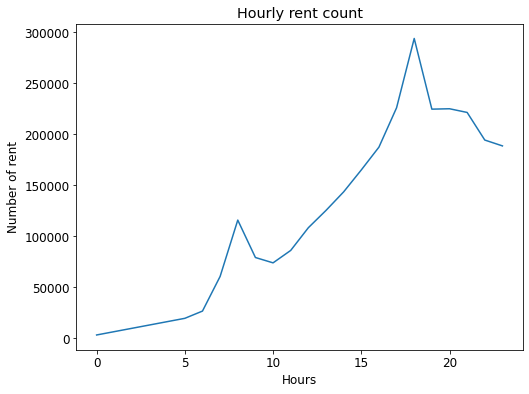

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Hours', fontsize='large')
ax.set_ylabel('Number of rent', fontsize='large')
ax.set_title('Hourly rent count', fontsize='x-large')

#### 조건 분석으로 확인

In [20]:
max(hourly_df_rent.count())

293881

In [21]:
hourly_df_rent.count() == max(hourly_df_rent.count())

대여일시
0     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
Name: 대여일시, dtype: bool

In [22]:
hourly_df_rent.count().index[hourly_df_rent.count() == max(hourly_df_rent.count())]

Int64Index([18], dtype='int64', name='대여일시')

In [19]:
print((f'가장 많이 대여하는 시간: '
       f'{hourly_df_rent.count().index[hourly_df_rent.count() == max(hourly_df_rent.count())][0]}'))

가장 많이 대여하는 시간: 18


### Step 3. Question - 언제 가장 많이 대여했을까?

#### groupby 활용 그루핑
##### [Pandas DatetimeIndex strftime](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.strftime.html)
##### [python 3 strftime format](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

In [23]:
daily_df_rent = df_rent['대여일시'].groupby(by=rent_index.strftime('%Y-%m-%d'))
daily_df_rent

In [24]:
daily_df_rent.count().index

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
       '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', name='대여일시', length=1698)

In [25]:
daily_df_rent.count()

대여일시
2016-01-01     884
2016-01-02    1313
2016-01-03    1600
2016-01-04    1181
2016-01-05     924
              ... 
2020-12-27     763
2020-12-28     885
2020-12-29     430
2020-12-30     229
2020-12-31     307
Name: 대여일시, Length: 1698, dtype: int64

#### 그래프 데이터 준비

In [26]:
x = daily_df_rent.count().index
y = daily_df_rent.count()

#### 그래프 그리기

Text(0.5, 1.0, 'Rent count')

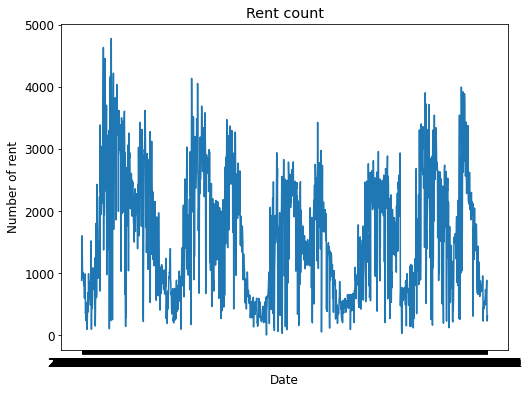

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Number of rent', fontsize='large')
ax.set_title('Rent count', fontsize='x-large')

#### 조건문으로 분석

In [28]:
max(daily_df_rent.count())

4776

In [29]:
daily_df_rent.count() == max(daily_df_rent.count())

대여일시
2016-01-01    False
2016-01-02    False
2016-01-03    False
2016-01-04    False
2016-01-05    False
              ...  
2020-12-27    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
2020-12-31    False
Name: 대여일시, Length: 1698, dtype: bool

In [12]:
print((f'가장 많이 대여한 날: '
       f'{daily_df_rent.count().index[daily_df_rent.count() == max(daily_df_rent.count())][0]}'))

가장 많이 대여한 날: 2016-05-05


### Step 4. Question - 몇년 몇월에 가장 많이 대여했을까?

#### groupby 활용 그루핑

In [30]:
monthly_df_rent = df_rent['대여일시'].groupby(by=rent_index.strftime('%Y-%m'))
monthly_df_rent

In [31]:
monthly_df_rent.count().index

Index(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2020-01', '2020-02', '2020-03', '2020-04',
       '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
       '2020-11', '2020-12'],
      dtype='object', name='대여일시')

In [32]:
monthly_df_rent.count()

대여일시
2016-01    22362
2016-02    21490
2016-03    57959
2016-04    85271
2016-05    96355
2016-06    89328
2016-07    67847
2016-08    65611
2016-09    72426
2016-10    69292
2016-11    38784
2016-12    24014
2017-01    19754
2017-02    21026
2017-03    47488
2017-04    73579
2017-05    84640
2017-06    75428
2017-07    45499
2017-08    52135
2017-09    81151
2017-10    62954
2017-11    33112
2017-12    14202
2018-01    11220
2018-02    13345
2018-03    40667
2018-04    49826
2018-05    59144
2018-06    64128
2018-07    46610
2018-08    41570
2018-09    63635
2018-10    52111
2018-11    31156
2018-12    14772
2019-01    14872
2019-02    15761
2019-03    30867
2019-04    50223
2019-05    69444
2019-06    63667
2019-07    58297
2019-08    59574
2020-01    19118
2020-02    19993
2020-03    54236
2020-04    75288
2020-05    75839
2020-06    60215
2020-07    49370
2020-08    38560
2020-09    73365
2020-10    73324
2020-11    36794
2020-12    19676
Name: 대여일시, dtype: int64

#### 그래프 데이터 준비

In [33]:
x = monthly_df_rent.count().index
y = monthly_df_rent.count()

#### 그래프 그리기

Text(0.5, 1.0, 'Rent count')

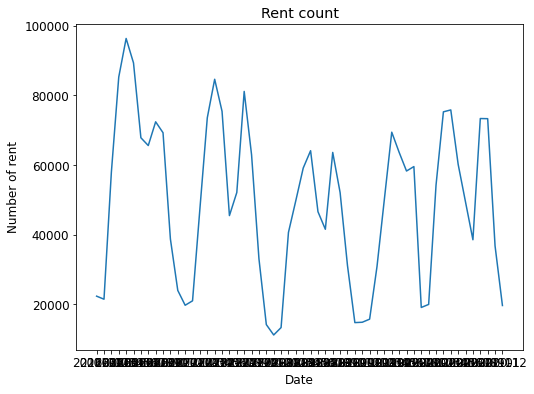

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Number of rent', fontsize='large')
ax.set_title('Rent count', fontsize='x-large')

#### 조건문으로 분석

In [35]:
max(monthly_df_rent.count())

96355

In [36]:
monthly_df_rent.count() == max(monthly_df_rent.count())

대여일시
2016-01    False
2016-02    False
2016-03    False
2016-04    False
2016-05     True
2016-06    False
2016-07    False
2016-08    False
2016-09    False
2016-10    False
2016-11    False
2016-12    False
2017-01    False
2017-02    False
2017-03    False
2017-04    False
2017-05    False
2017-06    False
2017-07    False
2017-08    False
2017-09    False
2017-10    False
2017-11    False
2017-12    False
2018-01    False
2018-02    False
2018-03    False
2018-04    False
2018-05    False
2018-06    False
2018-07    False
2018-08    False
2018-09    False
2018-10    False
2018-11    False
2018-12    False
2019-01    False
2019-02    False
2019-03    False
2019-04    False
2019-05    False
2019-06    False
2019-07    False
2019-08    False
2020-01    False
2020-02    False
2020-03    False
2020-04    False
2020-05    False
2020-06    False
2020-07    False
2020-08    False
2020-09    False
2020-10    False
2020-11    False
2020-12    False
Name: 대여일시, dtype: bool

In [37]:
print((f'가장 많이 대여한 날: '
       f'{monthly_df_rent.count().index[monthly_df_rent.count() == max(monthly_df_rent.count())][0]}'))

가장 많이 대여한 날: 2016-05


### Step 5. Question - 가장 많이 대여한 요일은?

#### groupby 활용 그루핑

In [38]:
weekly_df_rent = df_rent['대여일시'].groupby(by=rent_index.strftime('%w'))
weekly_df_rent

In [39]:
weekly_df_rent.count().index

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='대여일시')

In [40]:
weekly_df_rent.count()

대여일시
0    408358
1    370227
2    386121
3    382247
4    393375
5    396490
6    431556
Name: 대여일시, dtype: int64

#### 그래프 데이터 준비

In [41]:
x = weekly_df_rent.count().index
y = weekly_df_rent.count()
labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

#### 그래프 그리기

Text(0.5, 1.0, 'Rent count')

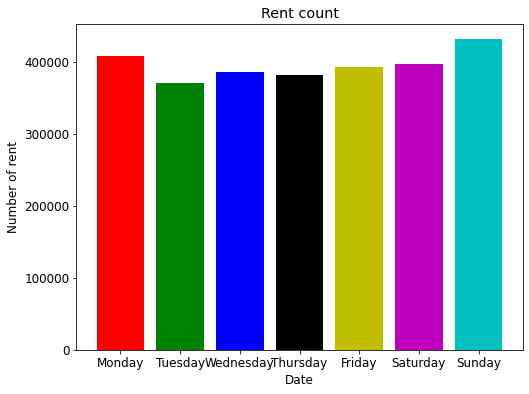

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.bar(x, y, color=colors, tick_label=list(labels.values()))
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Number of rent', fontsize='large')
ax.set_title('Rent count', fontsize='x-large')

#### 조건문으로 분석

In [46]:
max(weekly_df_rent.count())

431556

In [47]:
weekly_df_rent.count() == max(weekly_df_rent.count())

대여일시
0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: 대여일시, dtype: bool

In [48]:
print((f'가장 많이 대여한 날: '
       f'{weekly_df_rent.count().index[weekly_df_rent.count() == max(weekly_df_rent.count())][0]}'))

가장 많이 대여한 날: 6


### Step 6. Question - 어디서 가장 많이 빌리는가?

#### 대여 정류장으로 groupby

In [49]:
station_df_rent = df_rent['대여스테이션'].groupby(by=df_rent['대여스테이션'])
station_df_rent

In [50]:
station_df_rent.count()

대여스테이션
1      19470
2      17898
3      93912
4      26104
5      19544
       ...  
258     2141
259     7555
260     3314
261     1509
262      775
Name: 대여스테이션, Length: 262, dtype: int64

#### 대여 정류장 정렬

In [51]:
sorted_rent_station = station_df_rent.count().sort_values(ascending=False)
sorted_rent_station

대여스테이션
3      93912
186    82008
56     51536
31     49920
17     49214
       ...  
205      926
262      775
128      729
255      637
211      320
Name: 대여스테이션, Length: 262, dtype: int64

#### 정류장 정보 필터링

In [52]:
df_station[df_station.index == sorted_rent_station.index[0]]

,Station 스테이션/성명,위치,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명
연번,,,,,,,,,,
3,한밭수목원1,대전광역시 서구 만년동 396,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동


### Step 7. Question - 이동 목적으로 이용하는가?

#### 이동 목적 대여량

In [53]:
diff_rent = df_rent[df_rent['대여스테이션'] != df_rent['반납스테이션']]
diff_rent

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
0,46,2016-01-01 05:00:15,17,2016-01-01 05:04:51,380.0,0
1,152,2016-01-01 05:06:29,82,2016-01-01 05:37:53,3190.0,2
2,133,2016-01-01 05:24:16,172,2016-01-01 05:56:47,2070.0,2
3,133,2016-01-01 05:29:19,172,2016-01-01 05:57:34,2080.0,2
4,39,2016-01-01 05:32:44,57,2016-01-01 05:40:33,860.0,0
...,...,...,...,...,...,...
2791300,56,2020-12-31 23:36:38,148,2020-12-31 23:49:42,0.0,2
2791301,87,2020-12-31 23:38:50,118,2021-01-01 00:21:39,0.0,2
2791303,42,2020-12-31 23:45:59,83,2021-01-01 00:12:15,2470.0,0
2791304,115,2020-12-31 23:51:32,196,2021-01-01 00:15:02,1730.0,0


#### 여가 목적 대여량

In [54]:
same_rent = df_rent[df_rent['대여스테이션'] == df_rent['반납스테이션']]
same_rent

,대여스테이션,대여일시,반납스테이션,반납일시,이동거리,회원구분
13,157,2016-01-01 07:27:38,157,2016-01-01 07:50:22,740.0,0
27,145,2016-01-01 08:22:15,145,2016-01-01 08:22:35,0.0,2
83,35,2016-01-01 09:59:29,35,2016-01-01 10:19:09,1480.0,2
86,14,2016-01-01 10:16:17,14,2016-01-01 10:16:44,0.0,0
93,80,2016-01-01 10:37:27,80,2016-01-01 11:05:49,2550.0,1
...,...,...,...,...,...,...
2791273,206,2020-12-31 21:34:23,206,2020-12-31 22:29:45,650.0,2
2791280,147,2020-12-31 22:05:11,147,2020-12-31 22:22:12,1170.0,2
2791290,122,2020-12-31 22:57:25,122,2020-12-31 23:35:23,3050.0,2
2791291,174,2020-12-31 22:59:31,174,2020-12-31 22:59:49,0.0,2


#### 이동 목적 대여 최대 정류장

In [55]:
t = diff_rent['대여스테이션'].groupby(by=diff_rent['대여스테이션'])
sorted_t = t.count().sort_values(ascending=False)
sorted_t

대여스테이션
186    51132
3      48480
17     43234
56     42157
33     38512
       ...  
205      623
262      535
255      533
128      440
211      223
Name: 대여스테이션, Length: 262, dtype: int64

#### 이동 목적 대여 최대 정류장 정보

In [56]:
df_station[df_station.index == sorted_t.index[0]]

,Station 스테이션/성명,위치,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명
연번,,,,,,,,,,
186,한밭수목원2,대전광역시 서구 만년동 396,30,대전광역시,30170,서구,3017012800,만년동,3017065000,만년동


#### 여가 목적 대여 최대 정류장

In [57]:
t = same_rent['대여스테이션'].groupby(by=same_rent['대여스테이션'])
sorted_t = t.count().sort_values(ascending=False)
sorted_t

대여스테이션
3      45432
186    30876
31     13890
56      9379
33      6866
       ...  
262      240
235      234
210      202
255      104
211       97
Name: 대여스테이션, Length: 262, dtype: int64

### Step 8. Question - 정류장 기준 가장 많이 이용하는 경로는?

#### groupby 를 순차적으로 적용

In [58]:
df = df_rent['대여일시'].groupby(by=[df_rent['대여스테이션'], df_rent['반납스테이션']])
df.count()

대여스테이션  반납스테이션
1       1         4386
        2          261
        3         1596
        4          143
        5          271
                  ... 
262     232          2
        250          2
        253          2
        256          1
        262        240
Name: 대여일시, Length: 40898, dtype: int64

#### 조건문으로 빠르게 확인!

In [59]:
df.count().index[df.count() == max(df.count())]

MultiIndex([(3, 3)],
           names=['대여스테이션', '반납스테이션'])

#### 이동 목적 데이터에서만 확인

In [60]:
df = diff_rent['대여일시'].groupby(by=[diff_rent['대여스테이션'], diff_rent['반납스테이션']])
df.count()

대여스테이션  반납스테이션
1       2          261
        3         1596
        4          143
        5          271
        6           79
                  ... 
262     231          1
        232          2
        250          2
        253          2
        256          1
Name: 대여일시, Length: 40636, dtype: int64

#### 조건문으로 결과 확인

In [61]:
df.count().index[df.count() == max(df.count())]

MultiIndex([(186, 3)],
           names=['대여스테이션', '반납스테이션'])

### Step 9. Question - 이동 거리 분석

#### groupby 처리

In [65]:
df = df_rent.groupby(by=[df_rent['대여스테이션'], df_rent['반납스테이션']])
df = df.mean()
df

이동거리      회원구분
대여스테이션 반납스테이션                       
1      1       1372.067993  1.868217
       2       1525.517212  1.517241
       3       1605.119019  1.909774
       4       1470.839111  1.769231
       5       1674.870850  1.848708
...                    ...       ...
262    232     3460.000000  1.500000
       250     1490.000000  0.000000
       253     3210.000000  1.000000
       256     3700.000000  2.000000
       262     1411.250000  1.612500

[40898 rows x 2 columns]

#### 회원 구분 (1 or 0) 은 불필요한 열

In [66]:
df.drop(columns='회원구분', inplace=True)
df

이동거리
대여스테이션 반납스테이션             
1      1       1372.067993
       2       1525.517212
       3       1605.119019
       4       1470.839111
       5       1674.870850
...                    ...
262    232     3460.000000
       250     1490.000000
       253     3210.000000
       256     3700.000000
       262     1411.250000

[40898 rows x 1 columns]

#### 조건문으로 확인

In [67]:
print((f'평균적으로 가장 멀리 이동한 대여-반납 경로: '
       f'{df.index[df["이동거리"] == max(df["이동거리"])][0]}'))

평균적으로 가장 멀리 이동한 대여-반납 경로: (22, 147)


#### isin 으로 빠르게 정보 필터링

In [68]:
df_station[df_station.index.isin(df.index[df["이동거리"] == max(df["이동거리"])][0])]

,Station 스테이션/성명,위치,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,행정동코드,행정동명
연번,,,,,,,,,,
22,카이스트 창의학습관,대전광역시 유성구 구성동 23,30,대전광역시,30200,유성구,3020012400,구성동,3020054000,온천2동
147,도안 계룡리슈빌(1704동),대전광역시 서구 도안동 1370,30,대전광역시,30170,서구,3017011500,도안동,3017059000,가수원동
